## Dust emissions and atmospheric indecies what factors controlls the emissions

It is well established that majority of dust event occur in Spring.
A large vararity of causes is suggested to controll the variability in Asian dust sources including the large scale atmospheric circulation patterens, teleconnections and regional climate conditions, which affect the winter disturbances that directly cause the dust events. 

This will be the main foucs of the lavterskel. Main point I want to get across is what controll the dust emissions in the different source regions
Look at some special years:
* 2003
* 2005
* 2008
* 2018

Need to also make the spring indecies.

In [1]:
import xarray as xr
import DUST
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
import matplotlib.dates as mdates
import statsmodels.formula.api as sm
from DUST.plot.maps import map_terrain_china
import cartopy.crs as ccrs
import DUST.plot.plotting as dplot
from matplotlib.patches import Rectangle
import numpy as np
from thesis_toolbox.utils import extract_source_region
# latex_plot()
%matplotlib inline

In [2]:
if 'snakemake' in globals():
    to_file = True
    path='./'
else:
    path = '../../'
    to_file= False

In [3]:
def format_plot(ax, n=5):
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_minor_locator(  AutoMinorLocator(n))
    ax.xaxis.set_minor_locator(  AutoMinorLocator(n))


def plot_emission_timeseries(ax, df, keys):
    for key, ds in ems_dir.items():
        ax.plot(ds.time,ds.Emission, label=key, linestyle='dashdot', linewidth=2)
    ax.set_ylabel('Emission (kg)')
    ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.legend()
# latex_plot()

In [4]:
# Load dust emission data

df = pd.read_csv(path+'results/timeseries_table.csv',
                index_col=0)
taklamakan = df['Emissions taklamakan']
mongolia = df['Emissions mongolia']
CLP_north_west = df['Emissions north_west']
rest = df['Emissions total'] - taklamakan - mongolia -CLP_north_west

desert_colors = ['tab:brown','tab:blue', 'tab:orange', 'tab:green', '#86A3A6']

### Emission Series

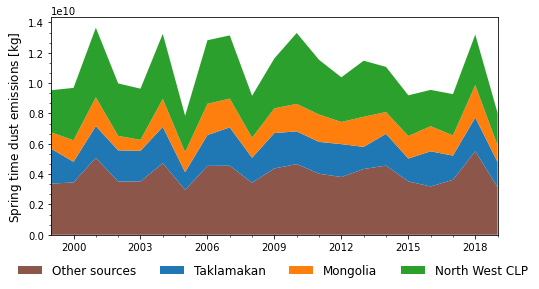

In [5]:
fig,ax = plt.subplots(figsize=(8,4))
# plot_emission_timeseries(ax, all_ems_dir)
ax.stackplot(taklamakan.index,rest.values, taklamakan.values,mongolia.values,CLP_north_west.values,
            labels=('Other sources','Taklamakan','Mongolia','North West CLP'),
            colors=desert_colors)
fig.legend(bbox_to_anchor=(0.51,0.001), ncol=4, loc='center', frameon=False, fontsize='large')
ax.set_xticks(taklamakan.index[1::3])
ax.set_xlim(1999,2019)
ax.set_ylabel('Spring time dust emissions [$\mathrm{kg}$]')
format_plot(ax, n=3)
if to_file:
    plt.savefig(snakemake.output.time_series, bbox_inches='tight')

## Emission maps

In [8]:
ems_path= path+ 'results/model_results/intermediate_results/emission_flux.china.MAM.1999-2019.nc'
ems_dset=xr.open_dataset(ems_path)

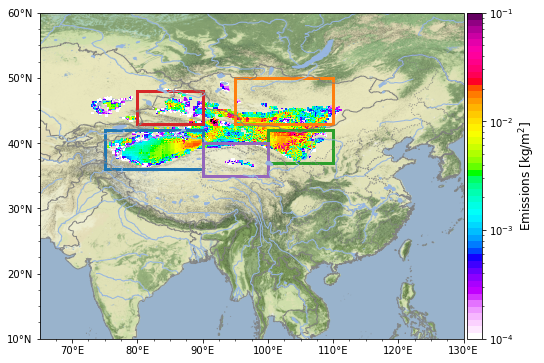

In [7]:
fig,ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()},
                     figsize=(8.2,6))
map_terrain_china(ax)
ax.set_extent([65,130, 15, 55])
ax.add_patch(Rectangle(xy=[75,36],width=15,height=6, transform=ccrs.PlateCarree(),fill=False,linewidth=3, edgecolor='tab:blue'))
ax.add_patch(Rectangle(xy=[100,37],width=10,height=5, transform=ccrs.PlateCarree(),fill=False,linewidth=3, edgecolor='tab:green'))
ax.add_patch(Rectangle(xy=[95,43],width=15,height=7, transform=ccrs.PlateCarree(),fill=False,linewidth=3, edgecolor='tab:orange'))
ax.add_patch(Rectangle(xy=[80,43],width=10,height=5, transform=ccrs.PlateCarree(),fill=False,linewidth=3, edgecolor='tab:red'))
ax.add_patch(Rectangle(xy=[90,35],width=10,height=5, transform=ccrs.PlateCarree(),fill=False,linewidth=3, edgecolor='tab:purple'))
dplot.mpl_base_map_plot_xr(ems_dset['Emission'].resample(time='Y').sum().mean(dim='time',keep_attrs=True),ax=ax,
                           transform=ccrs.PlateCarree(), cbar_label = 'Emissions [$\mathrm{kg}/\mathrm{m}^2$]'
                          )
ax.set_yticks([10,20,30, 40, 50, 60], crs=ccrs.PlateCarree())
ax.set_xticks([70,80, 90, 100, 110,120,130], crs=ccrs.PlateCarree())
# ax.set_title('Averaged spring emissions 1999-2019 simulated by FLEXDUST',y=1.05)
ax.set_xlabel('')
ax.set_ylabel('')
if to_file:
    plt.savefig(snakemake.output.ems_map,bbox_inches='tight' )

* Red Junggar Basin
* Purple Qaidam Baisin.
* Orange Mongolia
* Blue Taklamakan
* Green North west Loess Plateu

In [21]:
df_emissions = df[['Emissions total','Emissions mongolia','Emissions taklamakan','Emissions north_west']]
df_emissions['rest'] = df['Emissions total']- df.loc[:,['Emissions mongolia','Emissions taklamakan','Emissions north_west']].sum(axis=1)

<ipython-input-21-e9aec07099e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emissions['rest'] = df['Emissions total']- df.loc[:,['Emissions mongolia','Emissions taklamakan','Emissions north_west']].sum(axis=1)


In [22]:
df_emissions

,Emissions total,Emissions mongolia,Emissions taklamakan,Emissions north_west,rest
1999,9.533220e+09,1.079654e+09,2.294521e+09,2.782003e+09,3.377042e+09
2000,9.689081e+09,1.423977e+09,1.361200e+09,3.453934e+09,3.449970e+09
2001,1.365629e+10,1.901350e+09,2.087211e+09,4.588227e+09,5.079498e+09
2002,9.982301e+09,9.512298e+08,2.058448e+09,3.462815e+09,3.509808e+09
2003,9.635154e+09,7.249617e+08,2.019257e+09,3.371356e+09,3.519580e+09
2004,1.325047e+10,1.840090e+09,2.392675e+09,4.296205e+09,4.721502e+09
2005,7.846615e+09,1.315473e+09,1.175614e+09,2.399879e+09,2.955649e+09
2006,1.282944e+10,2.057526e+09,2.033978e+09,4.193139e+09,4.544794e+09
2007,1.314937e+10,1.900265e+09,2.524689e+09,4.169020e+09,4.555392e+09
2008,9.166239e+09,1.324545e+09,1.647314e+09,2.762076e+09,3.432304e+09


In [24]:
df_emissions.mean()/df_emissions['Emissions total'].mean()

Emissions total         1.000000
Emissions mongolia      0.142213
Emissions taklamakan    0.181190
Emissions north_west    0.307654
rest                    0.368944
dtype: float64

In [6]:
def get_spring_mean_emission(ems_dset,lon0,lon1,lat0,lat1):
    ems_m = ems_dset.sel(lon=slice(lon0,lon1),lat=slice(lat0,lat1)).mean(dim='time') 
    ems_m = ems_m['Emission']*ems_m['area']
    ems_m = ems_m.sum(dim=['lon','lat'])
    return ems_m.values

In [9]:
# Taklamakan
lon0,lon1,lat0,lat1 = extract_source_region('taklamakan')
ems_m_taklamakan = get_spring_mean_emission(ems_dset,lon0,lon1,lat0,lat1)
lon0,lon1,lat0,lat1 = extract_source_region('mongolia')
ems_m_mongolia = get_spring_mean_emission(ems_dset,lon0,lon1,lat0,lat1)
lon0,lon1,lat0,lat1 = extract_source_region('north_west')
ems_m_nort_west = get_spring_mean_emission(ems_dset,lon0,lon1,lat0,lat1)
# ems_m_taklamakan = ems_dset.sel(lon=slice(lon0,lon1),lat=slice(lat0,lat1)).mean(dim='time') 
# ems_m_taklamakan = ems_dset['Emission']*ems_dset['area']

In [11]:
print(" Emissions Taklamakan: {:1.3f} Mt \n Emissions Mongolia: {:1.3f} Mt \n Emissions north west: {:1.3f} Mt".format(ems_m_taklamakan/1e9,ems_m_mongolia/1e9,ems_m_nort_west/1e9))

 Emissions Taklamakan: 1.962 Mt 
 Emissions Mongolia: 1.540 Mt 
 Emissions north west: 3.332 Mt
